In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


C:\Users\woosh\AppData\Local\Temp\ipykernel_1580\2200693214.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv('covertype\covertype.csv')

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\woosh\AppData\Local\Temp\ipykernel_1580\496866404.py:1: SyntaxWarning: invalid escape sequence '\c'
  df = pd.read_csv('covertype\covertype.csv')


In [4]:
df

,index,elevation,aspect,slope,horizontal_distance_to_hydrology,vertical_distance_to_hydrology,horizontal_distance_to_roadways,hillshade_9am,hillshade_noon,hillshade_3pm,horizontal_distance_to_fire_points,wilderness_type,usfs_code,usfs_code_desc,climatic_zone,geologic_zone,cover_type
0,0,2596,51,3,258,0,510,221,232,148,6279,Rawah,7745,"Como - Legault families complex, extremely stony",subalpine,igneous and metamorphic,Aspen
1,1,2590,56,2,212,-6,390,220,235,151,6225,Rawah,7745,"Como - Legault families complex, extremely stony",subalpine,igneous and metamorphic,Aspen
2,2,2804,139,9,268,65,3180,234,238,135,6121,Rawah,4744,"Legault family - Rock land complex, stony",montane,igneous and metamorphic,Lodgepole Pine
3,3,2785,155,18,242,118,3090,238,238,122,6211,Rawah,7746,Como family - Rock land - Legault family compl...,subalpine,igneous and metamorphic,Lodgepole Pine
4,4,2595,45,2,153,-1,391,220,234,150,6172,Rawah,7745,"Como - Legault families complex, extremely stony",subalpine,igneous and metamorphic,Aspen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,581007,2396,153,20,85,17,108,240,237,118,837,Comanche Peak,2703,"Vanet - Ratake families complex, very stony",lower montane,igneous and metamorphic,Ponderosa Pine
581008,581008,2391,152,19,67,12,95,240,237,119,845,Comanche Peak,2703,"Vanet - Ratake families complex, very stony",lower montane,igneous and metamorphic,Ponderosa Pine
581009,581009,2386,159,17,60,7,90,236,241,130,854,Comanche Peak,2703,"Vanet - Ratake families complex, very stony",lower montane,igneous and metamorphic,Ponderosa Pine
581010,581010,2384,170,15,60,5,90,230,245,143,864,Comanche Peak,2703,"Vanet - Ratake families complex, very stony",lower montane,igneous and metamorphic,Ponderosa Pine


### 1. Distribution of ```cover_type``` across different ```wilderness_type```

cover_type        Aspen  Cottonwood/Willow  Douglas-fir  Krummholz  \
wilderness_type                                                      
Cache la Poudre     NaN             2747.0       9741.0        NaN   
Comanche Peak    5712.0                NaN       7626.0    13105.0   
Neota               NaN                NaN          NaN     2304.0   
Rawah            3781.0                NaN          NaN     5101.0   

cover_type       Lodgepole Pine  Ponderosa Pine  Spruce/Fir  
wilderness_type                                              
Cache la Poudre          3026.0         21454.0         NaN  
Comanche Peak          125093.0         14300.0     87528.0  
Neota                    8985.0             NaN     18595.0  
Rawah                  146197.0             NaN    105717.0  


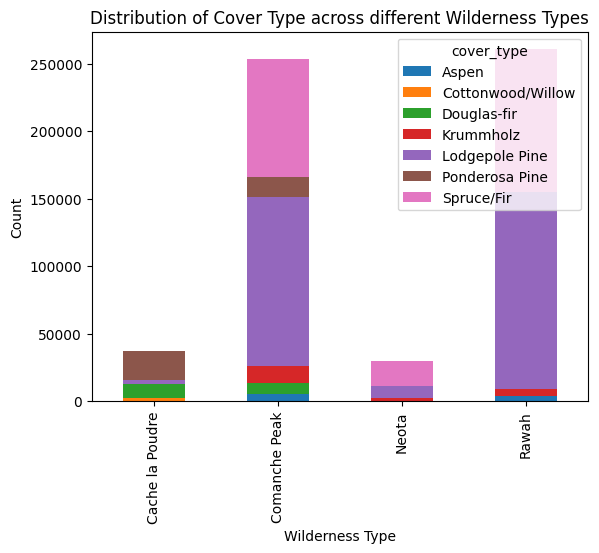

In [5]:
# Distribution of type vs type = Stacked Bar chart

cover_wilderness_counts = df.groupby(['wilderness_type', 'cover_type']).size().unstack()
print(cover_wilderness_counts)
cover_wilderness_counts.plot(kind='bar', stacked=True)
plt.title('Distribution of Cover Type across different Wilderness Types')
plt.xlabel('Wilderness Type')
plt.ylabel('Count')
plt.show()

### 2. Distribution of elevation on each ```cover_type```

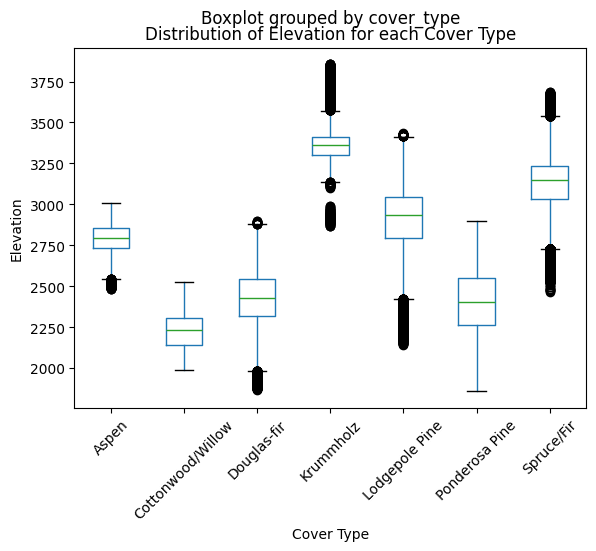

In [6]:
# Distribution of type vs number = Boxplot
df.boxplot(by='cover_type', column='elevation', grid=False)
plt.title('Distribution of Elevation for each Cover Type')
plt.xlabel('Cover Type')
plt.ylabel('Elevation')
plt.xticks(rotation=45)
plt.show()

### 3. Number of data points on each climatic zone

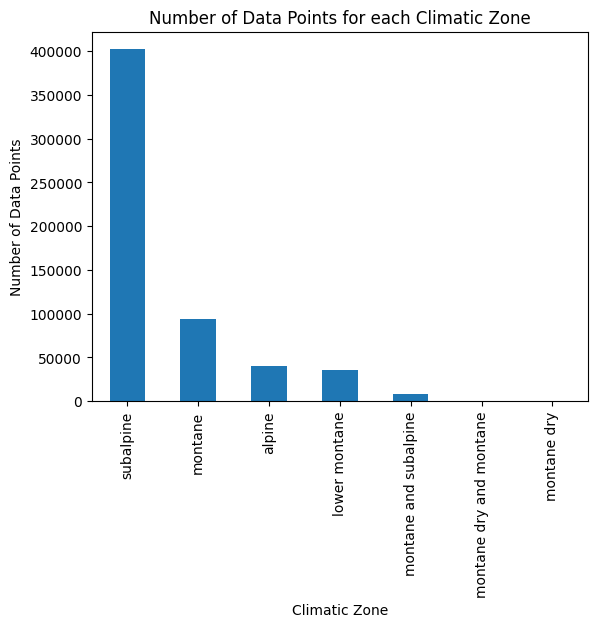

climatic_zone
subalpine                  401983
montane                     93593
alpine                      40437
lower montane               35947
montane and subalpine        8166
montane dry and montane       602
montane dry                   284
Name: count, dtype: int64


In [7]:
# Assuming df is your DataFrame and it has a column 'cover_type'
cover_type_counts = df['climatic_zone'].value_counts()
cover_type_counts.plot(kind='bar')
plt.title('Number of Data Points for each Climatic Zone')
plt.xlabel('Climatic Zone')
plt.ylabel('Number of Data Points')
plt.show()

print(cover_type_counts)

### 4. Which cover type dominates subalpine climate?

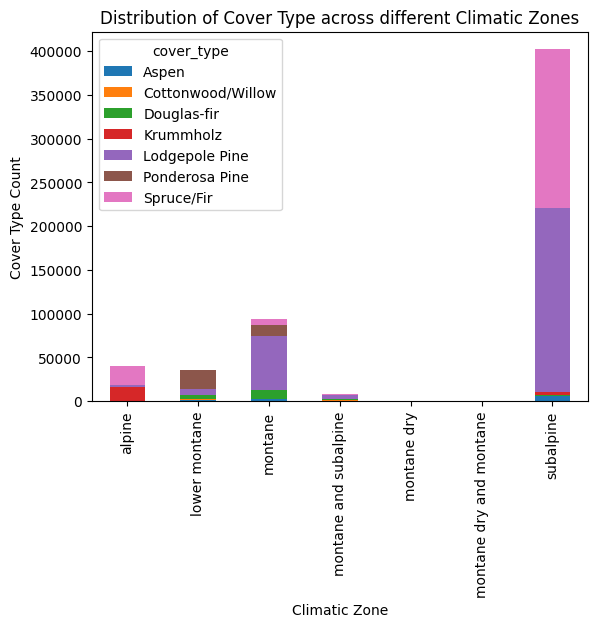

In [8]:
cover_climatic_counts = df.groupby(['climatic_zone', 'cover_type']).size().unstack()
cover_climatic_counts.plot(kind='bar', stacked=True)
plt.title('Distribution of Cover Type across different Climatic Zones')
plt.xlabel('Climatic Zone')
plt.ylabel('Cover Type Count')
plt.show()

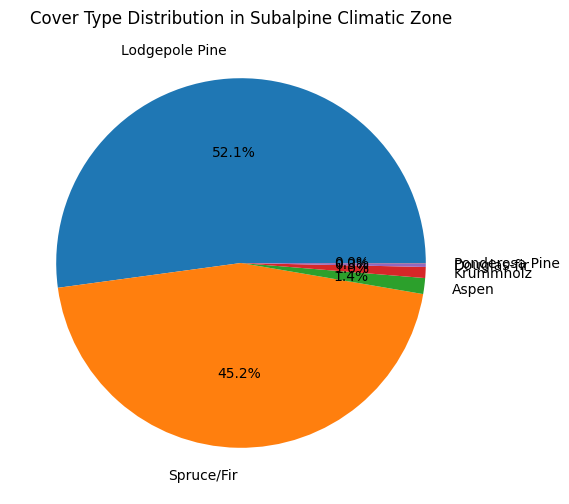

In [22]:
subalpine_df = df[df['climatic_zone'] == 'subalpine']
cover_type_counts = subalpine_df['cover_type'].value_counts()

plt.figure(figsize=(10,6))
plt.pie(cover_type_counts, labels=cover_type_counts.index, 
        autopct='%1.1f%%',labeldistance=1.15,pctdistance=.6)
plt.title('Cover Type Distribution in Subalpine Climatic Zone')
plt.show()

**Answer:** Lodgepole Pine dominates all others cover types in subalpine climate.

### 5. Which cover type is likely to be found near a body of water?

> Assuming that by the covertype to be recognized as near a body of water, the horizontal and vertical distances to hydrology should be **less or equal to 20**

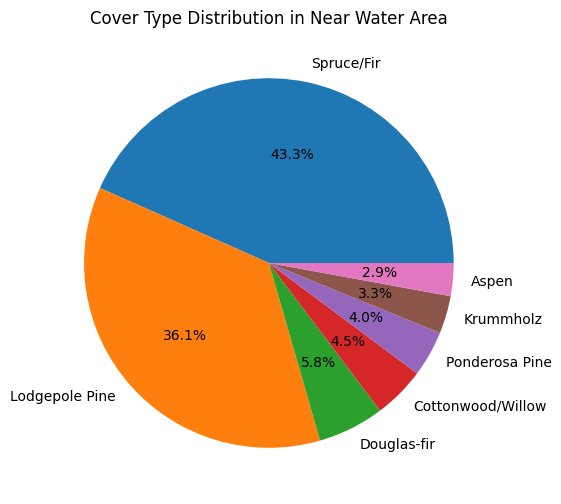

In [ ]:
# Assuming df is your DataFrame and it has columns 'horizontal_distance_to_hydrology' and 'vertical_distance_to_hydrology'
near_water_df = df[(df['horizontal_distance_to_hydrology'] <= 20) & (df['vertical_distance_to_hydrology'] <= 20 )]
near_water_cover_type_counts = near_water_df['cover_type'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(near_water_cover_type_counts, labels=near_water_cover_type_counts.index, autopct='%1.1f%%')
plt.title('Cover Type Distribution in Near Water Area')
plt.show()


**answer:** Spruce/Fir Cover Type is what will be likely found near water area.

### 6. Which cover type is likely to be found in a shady area from 9 am to noon.

Wait for P'TA answer

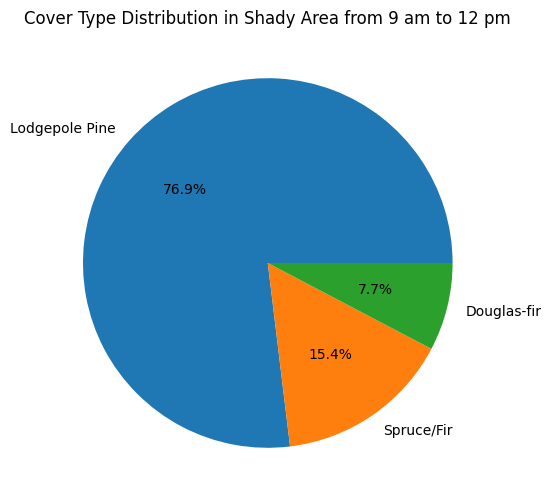

In [ ]:
shady_df = df[(df['hillshade_9am'] <= 100) & (df['hillshade_noon'] <= 100 )]
shady_cover_type_counts = shady_df['cover_type'].value_counts()

plt.figure(figsize=(10,6))
plt.pie(shady_cover_type_counts, labels=shady_cover_type_counts.index, autopct='%1.1f%%')
plt.title('Cover Type Distribution in Shady Area from 9 am to 12 pm')
plt.show()


**answer:** Lodgepole Pine dominates all others cover types in subalpine climate.

### 7. Which cover type is likely to be found away from hazardous points (roadways/firepoints)?

> Assuming that by the covertype to be recognize as far from harzardous points, the horizontal distances to roadways/firepoint should be **more or equal to 3328m and 2550m, respectively** (calulated from 75th percentile of the data)

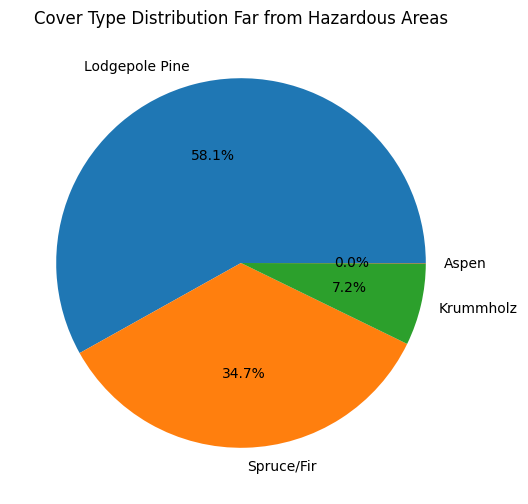

In [ ]:
far_hazard = df[(df['horizontal_distance_to_roadways'] >= 3328) & (df['horizontal_distance_to_fire_points'] >= 2550)]
far_hazard_cover_type_count = far_hazard['cover_type'].value_counts()

plt.figure(figsize=(10,6))
plt.pie(far_hazard_cover_type_count, labels=far_hazard_cover_type_count.index, autopct='%1.1f%%')
plt.title('Cover Type Distribution Far from Hazardous Areas')
plt.show()

**answer:** Lodgepole Pine Cover Type is what will be likely found far from hazardous zone.

### 8. Determine whether elevation provides more information to distinguish ```Krummholz``` from ```Cottonwood/Willow``` than ```horizontal_distance_to_hydrology``` ?

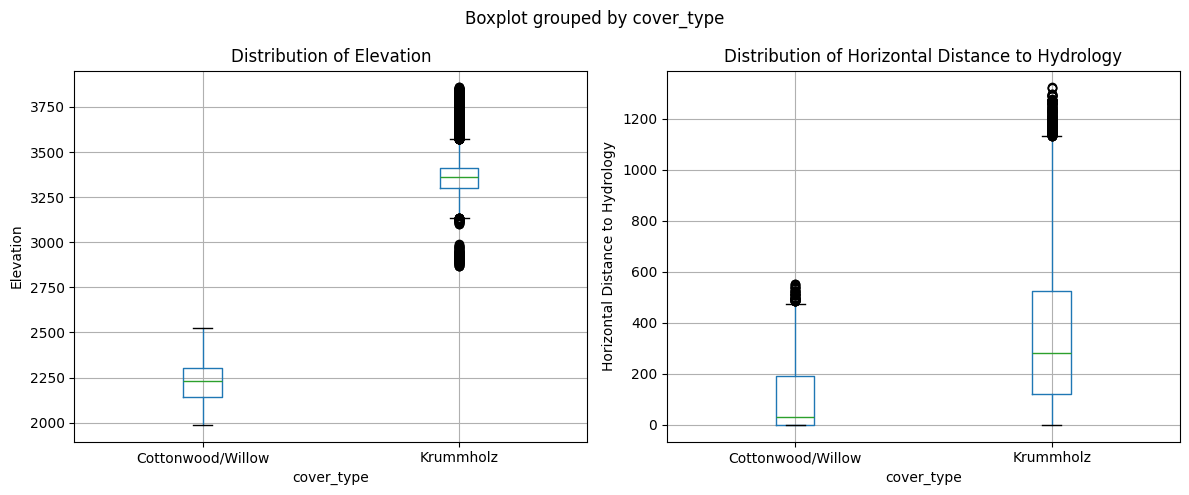

In [ ]:
filtered_df = df[df['cover_type'].isin(['Krummholz', 'Cottonwood/Willow'])]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
filtered_df.boxplot(by="cover_type", column="elevation", ax=ax1)
ax1.set_title('Distribution of Elevation')
ax1.set_ylabel('Elevation')
filtered_df.boxplot(by="cover_type", column="horizontal_distance_to_hydrology", ax=ax2)
ax2.set_title('Distribution of Horizontal Distance to Hydrology')
ax2.set_ylabel('Horizontal Distance to Hydrology')
plt.tight_layout()
plt.show()

***Answer*** = as you can see from the boxplot, elevation can be used to distinguish Krummholz from Cottonwood/Willow rather than using horizontal_distance_to_hydrology

### 9. Compare the relationship between ```Krummholz``` and ```Cottonwood/Willow``` to geographical features (elevation, distance to hydrology, hillshade, etc.).

There are elevation	aspect	slope	horizontal_distance_to_hydrology+vertical_distance_to_hydrology	horizontal_distance_to_roadways	hillshade_9am+hillshade_noon+hillshade_3pm	horizontal_distance_to_fire_points	wilderness_type	usfs_code	usfs_code_desc	climatic_zone	geologic_zone	cover_type


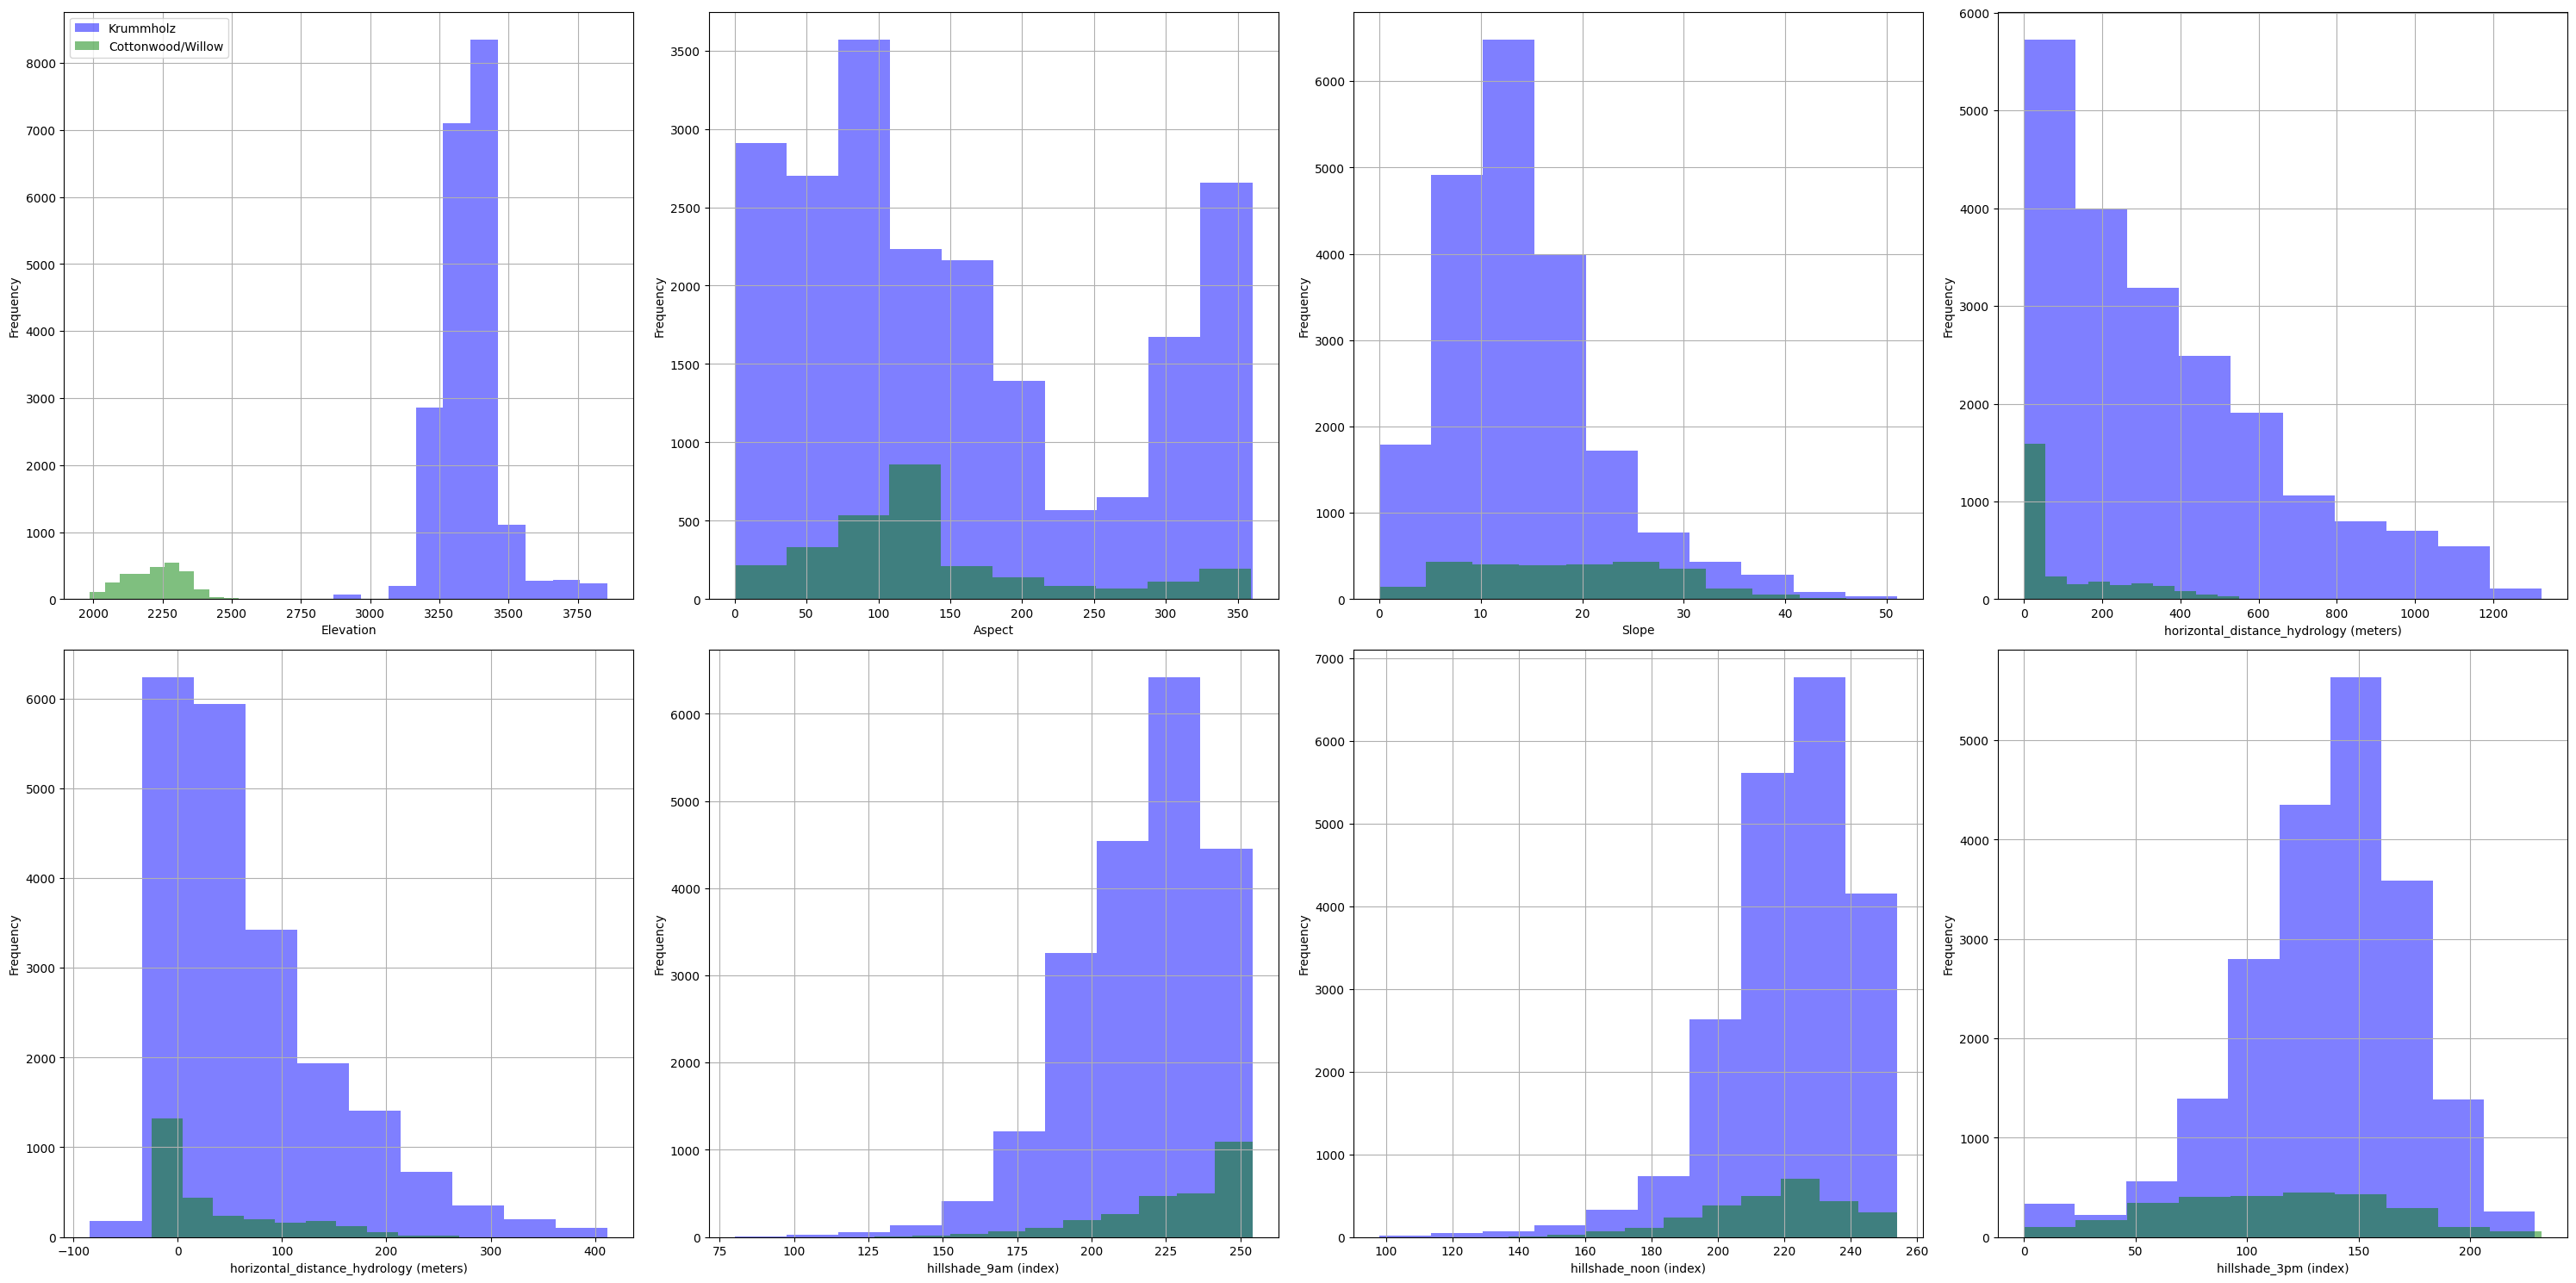

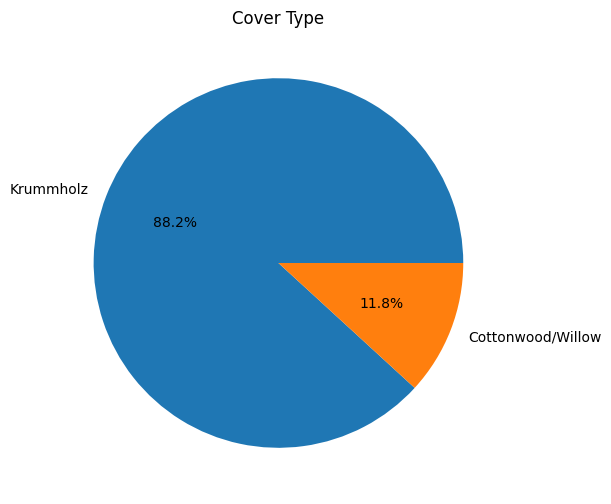

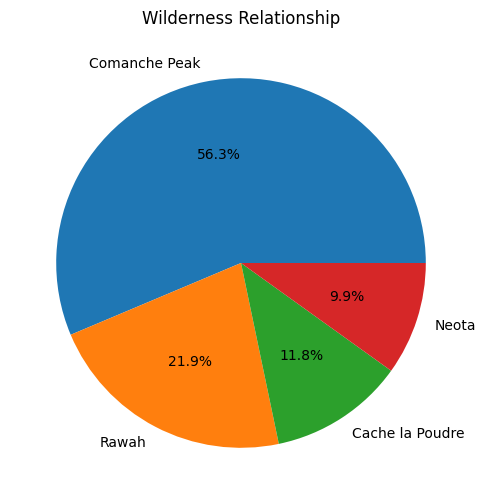

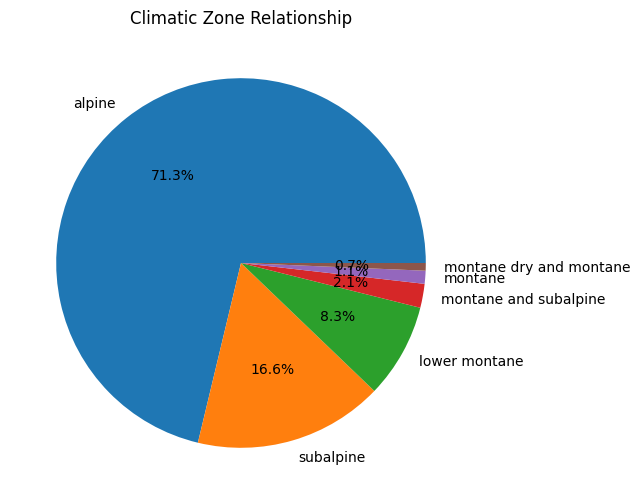

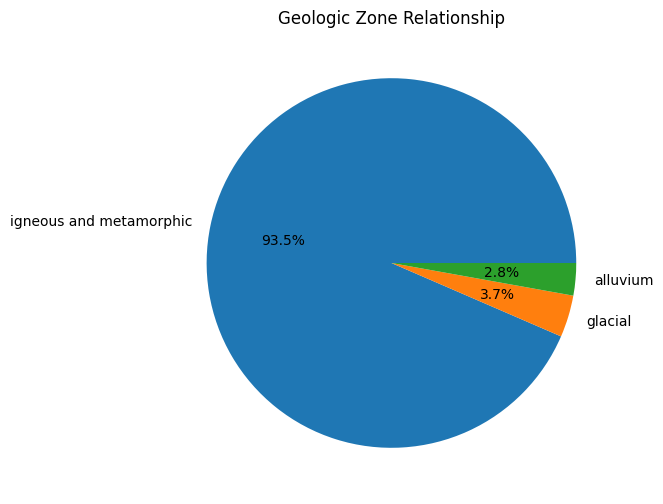

In [ ]:
filtered_df = df[df['cover_type'].isin(['Krummholz', 'Cottonwood/Willow'])]

plt.figure(figsize=(30,15))
plt.subplot(2,4,1)
plt.hist(filtered_df[filtered_df['cover_type'] == 'Krummholz']['elevation'],alpha=0.5, label='Krummholz', color='b')
plt.hist(filtered_df[filtered_df['cover_type'] == 'Cottonwood/Willow']['elevation'], alpha=0.5, label='Cottonwood/Willow', color='g')
plt.xlabel('Elevation')
plt.ylabel('Frequency')
plt.legend() 
plt.grid(True) 

plt.subplot(2,4,2)
plt.hist(filtered_df[filtered_df['cover_type'] == 'Krummholz']['aspect'], alpha=0.5, label='Krummholz', color='b')
plt.hist(filtered_df[filtered_df['cover_type'] == 'Cottonwood/Willow']['aspect'], alpha=0.5, label='Cottonwood/Willow', color='g')
plt.xlabel('Aspect')
plt.ylabel('Frequency')
plt.grid(True) 

plt.subplot(2,4,3)
plt.hist(filtered_df[filtered_df['cover_type'] == 'Krummholz']['slope'], alpha=0.5, label='Krummholz', color='b')
plt.hist(filtered_df[filtered_df['cover_type'] == 'Cottonwood/Willow']['slope'], alpha=0.5, label='Cottonwood/Willow', color='g')
plt.xlabel('Slope')
plt.ylabel('Frequency')
plt.grid(True) 

plt.subplot(2,4,4)
plt.hist(filtered_df[filtered_df['cover_type'] == 'Krummholz']['horizontal_distance_to_hydrology'], alpha=0.5, label='Krummholz', color='b')
plt.hist(filtered_df[filtered_df['cover_type'] == 'Cottonwood/Willow']['horizontal_distance_to_hydrology'], alpha=0.5, label='Cottonwood/Willow', color='g')
plt.xlabel('horizontal_distance_hydrology (meters)')
plt.ylabel('Frequency')
plt.grid(True) 

plt.subplot(2,4,5)
plt.hist(filtered_df[filtered_df['cover_type'] == 'Krummholz']['vertical_distance_to_hydrology'], alpha=0.5, label='Krummholz', color='b')
plt.hist(filtered_df[filtered_df['cover_type'] == 'Cottonwood/Willow']['vertical_distance_to_hydrology'], alpha=0.5, label='Cottonwood/Willow', color='g')
plt.xlabel('horizontal_distance_hydrology (meters)')
plt.ylabel('Frequency')
plt.grid(True) 

plt.subplot(2,4,6)
plt.hist(filtered_df[filtered_df['cover_type'] == 'Krummholz']['hillshade_9am'], alpha=0.5, label='Krummholz', color='b')
plt.hist(filtered_df[filtered_df['cover_type'] == 'Cottonwood/Willow']['hillshade_9am'], alpha=0.5, label='Cottonwood/Willow', color='g')
plt.xlabel('hillshade_9am (index)')
plt.ylabel('Frequency')
plt.grid(True) 

plt.subplot(2,4,7)
plt.hist(filtered_df[filtered_df['cover_type'] == 'Krummholz']['hillshade_noon'], alpha=0.5, label='Krummholz', color='b')
plt.hist(filtered_df[filtered_df['cover_type'] == 'Cottonwood/Willow']['hillshade_noon'], alpha=0.5, label='Cottonwood/Willow', color='g')
plt.xlabel('hillshade_noon (index)')
plt.ylabel('Frequency')
plt.grid(True) 

plt.subplot(2,4,8)
plt.hist(filtered_df[filtered_df['cover_type'] == 'Krummholz']['hillshade_3pm'], alpha=0.5, label='Krummholz', color='b')
plt.hist(filtered_df[filtered_df['cover_type'] == 'Cottonwood/Willow']['hillshade_3pm'], alpha=0.5, label='Cottonwood/Willow', color='g')
plt.xlabel('hillshade_3pm (index)')
plt.ylabel('Frequency')
plt.grid(True) 
plt.tight_layout()
plt.show()

filtered_df_count= filtered_df['cover_type'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(filtered_df_count, labels=filtered_df_count.index, autopct='%1.1f%%')
plt.title('Cover Type')
plt.show()

filtered_df_count_wilderness= filtered_df['wilderness_type'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(filtered_df_count_wilderness, labels=filtered_df_count_wilderness.index, autopct='%1.1f%%')
plt.title('Wilderness Relationship')
plt.show()

filtered_df_count_climatic= filtered_df['climatic_zone'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(filtered_df_count_climatic, labels=filtered_df_count_climatic.index, autopct='%1.1f%%')
plt.title('Climatic Zone Relationship')
plt.show()

filtered_df_count_geologic= filtered_df['geologic_zone'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(filtered_df_count_geologic, labels=filtered_df_count_geologic.index, autopct='%1.1f%%')
plt.title('Geologic Zone Relationship')
plt.show()

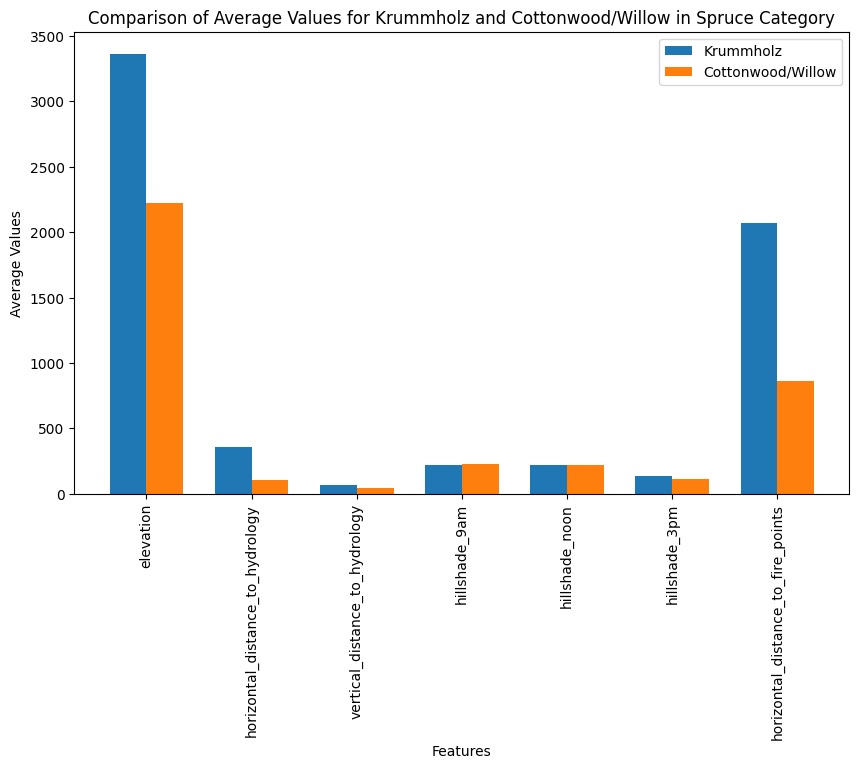

In [ ]:
krummholz_data = df[(df['cover_type'] == 'Krummholz')]
cottonwood_willow_data = df[(df['cover_type'] == 'Cottonwood/Willow')]


krummholz_avg_values = krummholz_data.mean(numeric_only=True)
cottonwood_willow_avg_values = cottonwood_willow_data.mean(numeric_only=True)

features_to_plot = ['elevation', 'horizontal_distance_to_hydrology', 'vertical_distance_to_hydrology','hillshade_9am', 'hillshade_noon', 'hillshade_3pm', 'horizontal_distance_to_fire_points']

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = range(len(features_to_plot))

bar1 = ax.bar(index, krummholz_avg_values[features_to_plot], bar_width, label='Krummholz')
bar2 = ax.bar([i + bar_width for i in index], cottonwood_willow_avg_values[features_to_plot], bar_width, label='Cottonwood/Willow')

ax.set_xlabel('Features')
ax.set_ylabel('Average Values')
ax.set_title('Comparison of Average Values for Krummholz and Cottonwood/Willow in Spruce Category')
ax.set_xticks([i + bar_width/2 for i in index])
ax.set_xticklabels(features_to_plot)
ax.legend()
plt.xticks(rotation=90)

plt.show()

### 10. Plot histogram of ```elevation```, ```aspect```, and ```slope```. Discuss the shape of the distribution.

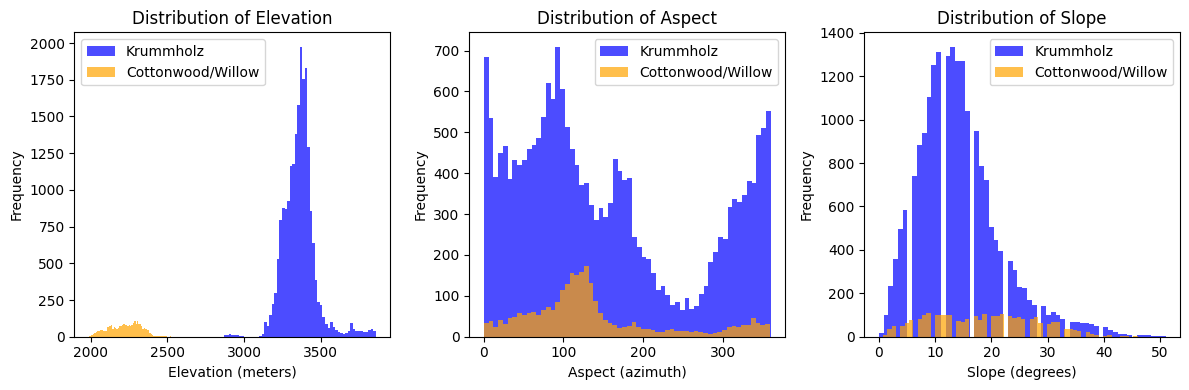

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.hist(krummholz_data['elevation'], bins=60, alpha=0.7, label='Krummholz', color='blue')
plt.hist(cottonwood_willow_data['elevation'], bins=60, alpha=0.7, label='Cottonwood/Willow', color='orange')
plt.xlabel('Elevation (meters)')
plt.ylabel('Frequency')
plt.title('Distribution of Elevation')
plt.legend()

plt.subplot(1, 3, 2)
plt.hist(krummholz_data['aspect'], bins=60, alpha=0.7, label='Krummholz', color='blue')
plt.hist(cottonwood_willow_data['aspect'], bins=60, alpha=0.7, label='Cottonwood/Willow', color='orange')
plt.xlabel('Aspect (azimuth)')
plt.ylabel('Frequency')
plt.title('Distribution of Aspect')
plt.legend()

plt.subplot(1, 3, 3)
plt.hist(krummholz_data['slope'], bins=60, alpha=0.7, label='Krummholz', color='blue')
plt.hist(cottonwood_willow_data['slope'], bins=60, alpha=0.7, label='Cottonwood/Willow', color='orange')
plt.xlabel('Slope (degrees)')
plt.ylabel('Frequency')
plt.title('Distribution of Slope')
plt.legend()

plt.tight_layout()
plt.show()

```Elevation:``` The graph shows that Krummholz have significantly higher elevated ground overall.

```Aspect:``` The aspect goes almost in the same way but Krummholz's aspect seem to have the frequency tripled compared to Cottonwood/Willow. This means, in Roosevelt National Forest of northern Colorado, there are more Krummholz forest cover types than Cottonwood/Willow.

```Slope:``` As can be seen from the aspect distribution, Krummholz's slope have way more steeper slope than Cottonwood/Willow. But you can see that some degrees are be seen at cottonwood/willow type but not at Krummholz.

### 11. For each member in your group, plot another useful visualization from this dataset.

This box plot helps to compare the central tendency and variability in elevation between the two species.

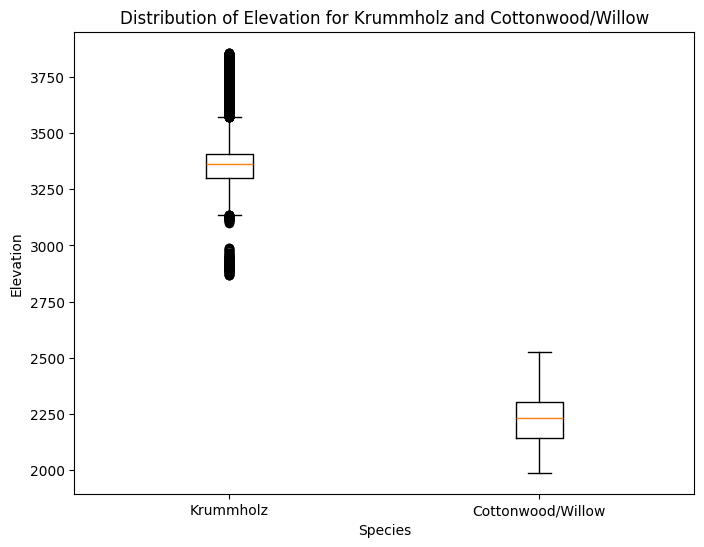

In [ ]:
krummholz_data = df[(df['cover_type'] == 'Krummholz')]
cottonwood_willow_data = df[(df['cover_type'] == 'Cottonwood/Willow')]

plt.figure(figsize=(8, 6))
plt.boxplot([krummholz_data['elevation'], cottonwood_willow_data['elevation']], labels=['Krummholz', 'Cottonwood/Willow'])
plt.xlabel('Species')
plt.ylabel('Elevation')
plt.title('Distribution of Elevation for Krummholz and Cottonwood/Willow')
plt.show()

This shows differences of climatic_zone in each cover type.

cover_type                Aspen  Cottonwood/Willow  Douglas-fir  Krummholz  \
climatic_zone                                                                
alpine                      NaN                NaN          NaN    16571.0   
lower montane             849.0             1847.0       4821.0       78.0   
montane                  2256.0              258.0       9991.0        6.0   
montane and subalpine     805.0              487.0        960.0        NaN   
montane dry                 NaN                NaN          NaN        NaN   
montane dry and montane     NaN              155.0        331.0        NaN   
subalpine                5583.0                NaN       1264.0     3855.0   

cover_type               Lodgepole Pine  Ponderosa Pine  Spruce/Fir  
climatic_zone                                                        
alpine                           1484.0             NaN     22382.0  
lower montane                    6206.0         21964.0       182.0  
montane          

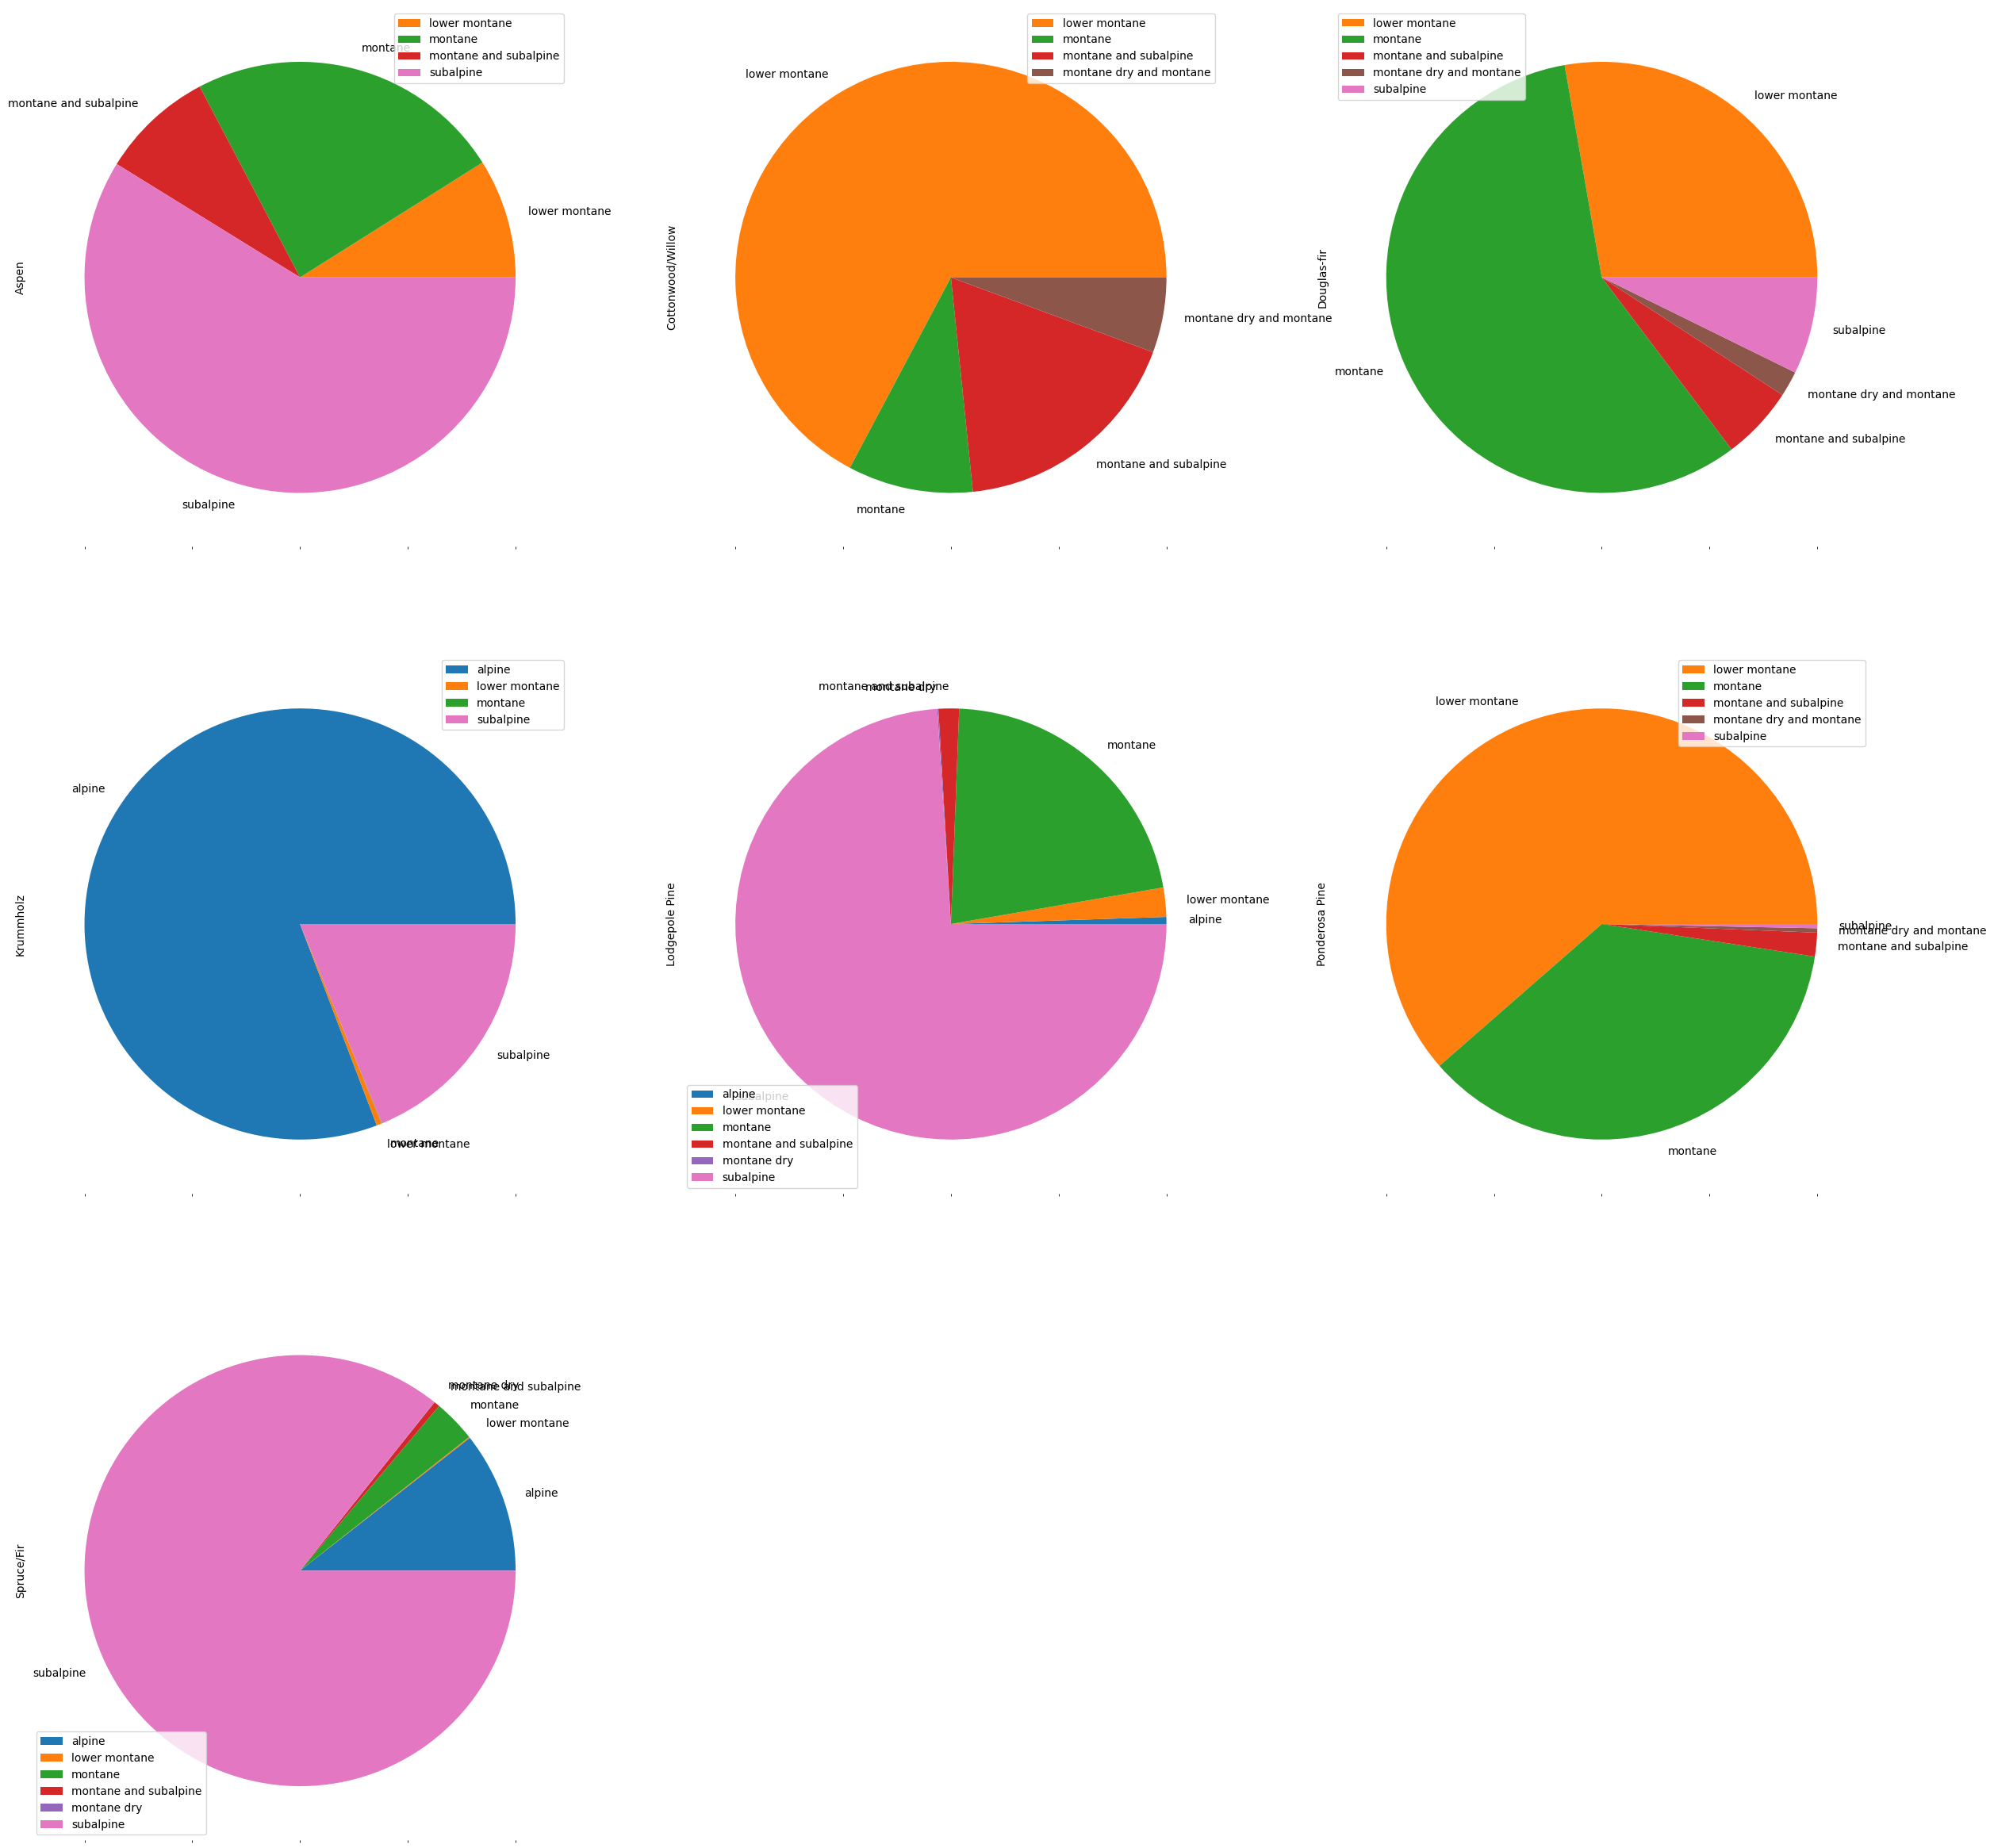

In [ ]:
climatic_zone_counts = df.groupby(['climatic_zone', 'cover_type']).size().unstack()
print(climatic_zone_counts)
climatic_zone_counts.plot(kind='pie', stacked=True,subplots=True,figsize=(30,30),layout=(3,3))
plt.show()